In [9]:
# Generate arcs and straight lines
def generate_arcs_lines(draw, width, height, num_arcs_lines, colors):
    for _ in range(num_arcs_lines):
        if random.random() > 0.5:
            # Draw arc
            bbox = [random.randint(0, width-100), random.randint(0, height-100), random.randint(100, width), random.randint(100, height)]
            start_angle = random.randint(0, 360)
            end_angle = start_angle + random.randint(30, 180)
            # Ensure y1 is greater than or equal to y0
            if bbox[3] < bbox[1]:
                bbox[1], bbox[3] = bbox[3], bbox[1]
            draw.arc(bbox, start=start_angle, end=end_angle, fill=random.choice(colors), width=random.randint(1, 3))
        else:
            # Draw straight line
            start_point = (random.randint(0, width), random.randint(0, height))
            end_point = (random.randint(0, width), random.randint(0, height))
            # Ensure y1 is greater than or equal to y0
            if end_point[1] < start_point[1]:
                start_point, end_point = end_point, start_point
            draw.line([start_point, end_point], fill=random.choice(colors), width=random.randint(1, 3))


ValueError: y1 must be greater than or equal to y0

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import random
import noise

# Parameters
width, height = 800, 1000
background_color = (240, 240, 240)
num_scribbles = 20
num_layers = 5

# Generate Perlin noise background
def generate_perlin_noise(width, height, scale=100):
    noise_img = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            noise_img[i][j] = noise.pnoise2(i/scale, j/scale, octaves=6, persistence=0.5, lacunarity=2.0)
    return noise_img

# Generate random scribbles
def generate_scribbles(draw, width, height, num_scribbles, colors):
    for _ in range(num_scribbles):
        points = [(random.randint(0, width), random.randint(0, height)) for _ in range(random.randint(5, 15))]
        draw.line(points, fill=random.choice(colors), width=random.randint(1, 3))

# Generate the final image
def generate_art(width, height, num_layers, background_color, num_scribbles):
    # Create an empty image
    img = Image.new('RGBA', (width, height), background_color)
    draw = ImageDraw.Draw(img)
    
    # Color palette representing inequality
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255), (255, 0, 255)]
    
    # Add layers of Perlin noise with transparency
    for _ in range(num_layers):
        noise_img = generate_perlin_noise(width, height)
        noise_img = (255 * (noise_img - noise_img.min()) / (noise_img.max() - noise_img.min())).astype(np.uint8)
        noise_layer = Image.fromarray(noise_img, mode='L').convert('RGBA')
        img = Image.blend(img, noise_layer, alpha=0.3)
    
    # Add random scribbles
    generate_scribbles(draw, width, height, num_scribbles, colors)
    
    return img

# Generate the artwork
art_image = generate_art(width, height, num_layers, background_color, num_scribbles)

# Save and show the artwork

art_image.show()


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import random

def generate_artwork(width=14, height=10, num_shapes=1000):
    # Set up the figure
    plt.figure(figsize=(width, height))
    plt.axis('off')

    # Create a grid structure
    grid_size = 50
    x_positions = np.linspace(0, 1, grid_size)
    y_positions = np.linspace(0, 1, grid_size)
    positions = np.array([(x, y) for x in x_positions for y in y_positions])

    # Generate random shapes with varying sizes and colors
    for _ in range(num_shapes):
        pos = random.choice(positions)
        size = np.random.exponential(scale=0.005)
        color = np.random.rand(3,)
        shape_type = random.choice(['circle', 'square'])

        if shape_type == 'circle':
            circle = plt.Circle(pos, size, color=color, alpha=0.7, edgecolor='black', linewidth=0.5)
            plt.gca().add_patch(circle)
        elif shape_type == 'square':
            square = plt.Rectangle((pos[0] - size / 2, pos[1] - size / 2), size, size, color=color, alpha=0.7, edgecolor='black', linewidth=0.5)
            plt.gca().add_patch(square)

    # Save the image as a poster

    plt.savefig(poster_path, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.show()

   


In [16]:
import numpy as np
from PIL import Image, ImageDraw
import random
import math

# Parameters
width, height = 800, 1000
background_color = (240, 240, 240)
num_scribbles = 20
num_arcs_lines = 30
num_shapes = 5
num_dots = 50

# Generate random energetic curves
def generate_energetic_curves(draw, width, height, num_curves, colors):
    for _ in range(num_curves):
        points = [(random.randint(0, width), random.randint(0, height)) for _ in range(random.randint(5, 15))]
        draw.line(points, fill=random.choice(colors), width=random.randint(1, 3))

# Generate arcs and straight lines
def generate_arcs_lines(draw, width, height, num_arcs_lines, colors):
    for _ in range(num_arcs_lines):
        if random.random() > 0.5:
            # Draw arc
            x0, y0 = random.randint(0, width-100), random.randint(0, height-100)
            x1, y1 = random.randint(x0+1, width), random.randint(y0+1, height)
            bbox = [x0, y0, x1, y1]
            start_angle = random.randint(0, 360)
            end_angle = start_angle + random.randint(30, 180)
            draw.arc(bbox, start=start_angle, end=end_angle, fill=random.choice(colors), width=random.randint(1, 3))
        else:
            # Draw straight line
            start_point = (random.randint(0, width), random.randint(0, height))
            end_point = (random.randint(0, width), random.randint(0, height))
            draw.line([start_point, end_point], fill=random.choice(colors), width=random.randint(1, 3))

# Generate symbolic shapes (triangle or rhombus)
def generate_shapes(draw, width, height, num_shapes, colors):
    for _ in range(num_shapes):
        shape_type = random.choice(['triangle', 'rhombus'])
        color = random.choice(colors)
        if shape_type == 'triangle':
            points = [(random.randint(0, width), random.randint(0, height)) for _ in range(3)]
            draw.polygon(points, outline=color, fill=color)
        else:
            center = (random.randint(50, width-50), random.randint(50, height-50))
            size = random.randint(20, 50)
            points = [(center[0], center[1]-size), (center[0]+size, center[1]), (center[0], center[1]+size), (center[0]-size, center[1])]
            draw.polygon(points, outline=color, fill=color)

# Generate dots (stars)
def generate_dots(draw, width, height, num_dots, color):
    for _ in range(num_dots):
        point = (random.randint(0, width), random.randint(0, height))
        draw.ellipse([point, (point[0]+2, point[1]+2)], fill=color)

# Generate grid-like structure
def generate_grid(draw, width, height, num_lines, colors):
    spacing = width // num_lines
    for i in range(0, width, spacing):
        draw.line([(i, 0), (i, height)], fill=random.choice(colors), width=2)
    for i in range(0, height, spacing):
        draw.line([(0, i), (width, i)], fill=random.choice(colors), width=2)

# Generate the final image
def generate_art(width, height, background_color, num_scribbles, num_arcs_lines, num_shapes, num_dots):
    # Create an empty image
    img = Image.new('RGBA', (width, height), background_color)
    draw = ImageDraw.Draw(img)
    
    # Color palette representing inequality
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255), (255, 0, 255)]
    
    # Generate grid structure
    generate_grid(draw, width, height, 10, colors)
    
    # Add random energetic curves
    generate_energetic_curves(draw, width, height, num_scribbles, colors)
    
    # Add arcs and straight lines
    generate_arcs_lines(draw, width, height, num_arcs_lines, colors)
    
    # Add symbolic shapes (triangle or rhombus)
    generate_shapes(draw, width, height, num_shapes, colors)
    
    # Add dots (stars)
    generate_dots(draw, width, height, num_dots, (255, 255, 255))
    
    return img

# Generate the artwork
art_image = generate_art(width, height, background_color, num_scribbles, num_arcs_lines, num_shapes, num_dots)

# Save and show the artwork

art_image.show()


down is final one


In [23]:
import numpy as np
from PIL import Image, ImageDraw
import random

# Parameters
width, height = 800, 1000
background_color = (255, 255, 255)
num_scribbles = 20
num_arcs_lines = 30
num_shapes = 5
num_dots = 50
num_circles = 15

# Generate random energetic curves
def generate_energetic_curves(draw, width, height, num_curves, color):
    for _ in range(num_curves):
        points = [(random.randint(0, width), random.randint(0, height)) for _ in range(random.randint(5, 15))]
        draw.line(points, fill=color, width=random.randint(1, 3))

# Generate recursive curves
def generate_recursive_curves(draw, width, height, depth, color):
    if depth == 0:
        return
    start_point = (random.randint(0, width), random.randint(0, height))
    end_point = (random.randint(0, width), random.randint(0, height))
    draw.line([start_point, end_point], fill=color, width=random.randint(1, 3))
    generate_recursive_curves(draw, width, height, depth - 1, color)

# Generate arcs and straight lines
def generate_arcs_lines(draw, width, height, num_arcs_lines, color):
    for _ in range(num_arcs_lines):
        if random.random() > 0.5:
            # Draw arc
            x0, y0 = random.randint(0, width-100), random.randint(0, height-100)
            x1, y1 = random.randint(x0+1, width), random.randint(y0+1, height)
            bbox = [x0, y0, x1, y1]
            start_angle = random.randint(0, 360)
            end_angle = start_angle + random.randint(30, 180)
            draw.arc(bbox, start=start_angle, end=end_angle, fill=color, width=random.randint(1, 3))
        else:
            # Draw straight line
            start_point = (random.randint(0, width), random.randint(0, height))
            end_point = (random.randint(0, width), random.randint(0, height))
            draw.line([start_point, end_point], fill=color, width=random.randint(1, 3))

# Generate symbolic shapes (triangle or rhombus)
def generate_shapes(draw, width, height, num_shapes, color):
    for _ in range(num_shapes):
        shape_type = random.choice(['triangle', 'rhombus'])
        if shape_type == 'triangle':
            points = [(random.randint(0, width), random.randint(0, height)) for _ in range(3)]
            draw.polygon(points, outline=color, fill=color)
        else:
            center = (random.randint(50, width-50), random.randint(50, height-50))
            size = random.randint(20, 50)
            points = [(center[0], center[1]-size), (center[0]+size, center[1]), (center[0], center[1]+size), (center[0]-size, center[1])]
            draw.polygon(points, outline=color, fill=color)

# Generate dots (stars)
def generate_dots(draw, width, height, num_dots, color):
    for _ in range(num_dots):
        point = (random.randint(0, width), random.randint(0, height))
        draw.ellipse([point, (point[0]+2, point[1]+2)], fill=color)

# Generate circles
def generate_circles(draw, width, height, num_circles, color):
    for _ in range(num_circles):
        x0, y0 = random.randint(0, width), random.randint(0, height)
        radius = random.randint(10, 100)
        draw.ellipse([x0-radius, y0-radius, x0+radius, y0+radius], outline=color, width=random.randint(1, 3))

# Generate the final image
def generate_art(width, height, background_color, num_scribbles, num_arcs_lines, num_shapes, num_dots, num_circles):
    # Create an empty image
    img = Image.new('RGB', (width, height), background_color)
    draw = ImageDraw.Draw(img)
    
    # Black color for elements
    color = (0, 0, 0)
    
    # Add random energetic curves
    generate_energetic_curves(draw, width, height, num_scribbles, color)
    
    # Add recursive curves
    generate_recursive_curves(draw, width, height, 3, color)
    
    # Add arcs and straight lines
    generate_arcs_lines(draw, width, height, num_arcs_lines, color)
    
    # Add symbolic shapes (triangle or rhombus)
    generate_shapes(draw, width, height, num_shapes, color)
    
    # Add dots (stars)
    generate_dots(draw, width, height, num_dots, color)
    
    # Add circles
    generate_circles(draw, width, height, num_circles, color)
    
    return img

# Generate the artwork
art_image = generate_art(width, height, background_color, num_scribbles, num_arcs_lines, num_shapes, num_dots, num_circles)

# Save and show the artwork

art_image.show()


down- my fav

In [27]:
import numpy as np
from PIL import Image, ImageDraw, ImageFilter
import random

# Parameters
width, height = 800, 1000
background_color = (255, 255, 255)
num_scribbles = 20
num_arcs_lines = 30
num_shapes = 5
num_dots = 50
num_circles = 15

# Create a function for pencil-like strokes
def pencil_stroke(draw, start_point, end_point, color, width):
    for i in range(random.randint(1, 3)):
        offset = random.randint(-3, 3)
        draw.line(
            [(start_point[0] + offset, start_point[1] + offset), (end_point[0] + offset, end_point[1] + offset)],
            fill=color, width=width)

# Generate random energetic curves with pencil strokes
def generate_energetic_curves(draw, width, height, num_curves, color):
    for _ in range(num_curves):
        points = [(random.randint(0, width//2), random.randint(0, height)) for _ in range(random.randint(5, 15))]
        for i in range(len(points) - 1):
            pencil_stroke(draw, points[i], points[i + 1], color, random.randint(1, 3))

# Generate recursive curves with pencil strokes
def generate_recursive_curves(draw, width, height, depth, color):
    if depth == 0:
        return
    start_point = (random.randint(0, width//2), random.randint(0, height))
    end_point = (random.randint(0, width//2), random.randint(0, height))
    pencil_stroke(draw, start_point, end_point, color, random.randint(1, 3))
    generate_recursive_curves(draw, width, height, depth - 1, color)

# Generate arcs and straight lines with pencil strokes
def generate_arcs_lines(draw, width, height, num_arcs_lines, color):
    for _ in range(num_arcs_lines):
        if random.random() > 0.5:
            # Draw arc
            x0, y0 = random.randint(0, width//2-100), random.randint(0, height)
            x1, y1 = random.randint(x0+1, width//2), random.randint(y0+1, height)
            bbox = [x0, y0, x1, y1]
            start_angle = random.randint(0, 360)
            end_angle = start_angle + random.randint(30, 180)
            draw.arc(bbox, start=start_angle, end=end_angle, fill=color, width=random.randint(1, 3))
        else:
            # Draw straight line
            start_point = (random.randint(0, width//2), random.randint(0, height))
            end_point = (random.randint(0, width//2), random.randint(0, height))
            pencil_stroke(draw, start_point, end_point, color, random.randint(1, 3))

# Generate symbolic shapes (triangle or rhombus) with pencil strokes
def generate_shapes(draw, width, height, num_shapes, color):
    for _ in range(num_shapes):
        shape_type = random.choice(['triangle', 'rhombus'])
        if shape_type == 'triangle':
            points = [(random.randint(width//2, width), random.randint(0, height)) for _ in range(3)]
            draw.polygon(points, outline=color, fill=None)
        else:
            center = (random.randint(width//2+50, width-50), random.randint(50, height-50))
            size = random.randint(20, 50)
            points = [(center[0], center[1]-size), (center[0]+size, center[1]), (center[0], center[1]+size), (center[0]-size, center[1])]
            draw.polygon(points, outline=color, fill=None)

# Generate dots (stars) with pencil strokes
def generate_dots(draw, width, height, num_dots, color):
    for _ in range(num_dots):
        point = (random.randint(width//2, width), random.randint(0, height))
        draw.ellipse([point, (point[0]+2, point[1]+2)], fill=color)

# Generate circles with pencil strokes
def generate_circles(draw, width, height, num_circles, color):
    for _ in range(num_circles):
        x0, y0 = random.randint(width//2, width), random.randint(0, height)
        radius = random.randint(10, 100)
        draw.ellipse([x0-radius, y0-radius, x0+radius, y0+radius], outline=color, width=random.randint(1, 3))

# Generate the final image with pencil sketch effect
def generate_art(width, height, background_color, num_scribbles, num_arcs_lines, num_shapes, num_dots, num_circles):
    # Create an empty image
    img = Image.new('RGB', (width, height), background_color)
    draw = ImageDraw.Draw(img)
    
    # Black color for elements
    color = (0, 0, 0)
    
    # Add random energetic curves
    generate_energetic_curves(draw, width, height, num_scribbles, color)
    
    # Add recursive curves
    generate_recursive_curves(draw, width, height, 3, color)
    
    # Add arcs and straight lines
    generate_arcs_lines(draw, width, height, num_arcs_lines, color)
    
    # Add symbolic shapes (triangle or rhombus)
    generate_shapes(draw, width, height, num_shapes, color)
    
    # Add dots (stars)
    generate_dots(draw, width, height, num_dots, color)
    
    # Add circles
    generate_circles(draw, width, height, num_circles, color)
    
    # Apply pencil sketch filter
    img = img.filter(ImageFilter.GaussianBlur(1))
    return img

# Generate the artwork
art_image = generate_art(width, height, background_color, num_scribbles, num_arcs_lines, num_shapes, num_dots, num_circles)

# Save and show the artwork

art_image.show()


In [30]:
import numpy as np
from PIL import Image, ImageDraw, ImageFilter, ImageOps
import random

# Parameters
width, height = 800, 1000
background_color = (255, 255, 255)
num_scribbles = 20
num_arcs_lines = 30
num_shapes = 5
num_dots = 50
num_circles = 15

# Create a function for pencil-like strokes
def pencil_stroke(draw, start_point, end_point, color, width):
    for i in range(random.randint(1, 3)):
        offset = random.randint(-3, 3)
        draw.line(
            [(start_point[0] + offset, start_point[1] + offset), (end_point[0] + offset, end_point[1] + offset)],
            fill=color, width=width)

# Generate random energetic curves with pencil strokes
def generate_energetic_curves(draw, width, height, num_curves, color):
    for _ in range(num_curves):
        points = [(random.randint(0, width//2), random.randint(0, height)) for _ in range(random.randint(5, 15))]
        for i in range(len(points) - 1):
            pencil_stroke(draw, points[i], points[i + 1], color, random.randint(1, 3))

# Generate recursive curves with pencil strokes
def generate_recursive_curves(draw, width, height, depth, color):
    if depth == 0:
        return
    start_point = (random.randint(0, width//2), random.randint(0, height))
    end_point = (random.randint(0, width//2), random.randint(0, height))
    pencil_stroke(draw, start_point, end_point, color, random.randint(1, 3))
    generate_recursive_curves(draw, width, height, depth - 1, color)

# Generate arcs and straight lines with pencil strokes
def generate_arcs_lines(draw, width, height, num_arcs_lines, color):
    for _ in range(num_arcs_lines):
        if random.random() > 0.5:
            # Draw arc
            x0, y0 = random.randint(0, width//2-100), random.randint(0, height)
            x1, y1 = random.randint(x0+1, width//2), random.randint(y0+1, height)
            bbox = [x0, y0, x1, y1]
            start_angle = random.randint(0, 360)
            end_angle = start_angle + random.randint(30, 180)
            draw.arc(bbox, start=start_angle, end=end_angle, fill=color, width=random.randint(1, 3))
        else:
            # Draw straight line
            start_point = (random.randint(0, width//2), random.randint(0, height))
            end_point = (random.randint(0, width//2), random.randint(0, height))
            pencil_stroke(draw, start_point, end_point, color, random.randint(1, 3))

# Generate symbolic shapes (triangle or rhombus) with pencil strokes
def generate_shapes(draw, width, height, num_shapes, color):
    for _ in range(num_shapes):
        shape_type = random.choice(['triangle', 'rhombus'])
        if shape_type == 'triangle':
            points = [(random.randint(width//2, width), random.randint(0, height)) for _ in range(3)]
            draw.polygon(points, outline=color, fill=None)
        else:
            center = (random.randint(width//2+50, width-50), random.randint(50, height-50))
            size = random.randint(20, 50)
            points = [(center[0], center[1]-size), (center[0]+size, center[1]), (center[0], center[1]+size), (center[0]-size, center[1])]
            draw.polygon(points, outline=color, fill=None)

# Generate dots (stars) with pencil strokes
def generate_dots(draw, width, height, num_dots, color):
    for _ in range(num_dots):
        point = (random.randint(width//2, width), random.randint(0, height))
        draw.ellipse([point, (point[0]+2, point[1]+2)], fill=color)

# Generate circles with pencil strokes
def generate_circles(draw, width, height, num_circles, color):
    for _ in range(num_circles):
        x0, y0 = random.randint(width//2, width), random.randint(0, height)
        radius = random.randint(10, 100)
        draw.ellipse([x0-radius, y0-radius, x0+radius, y0+radius], outline=color, width=random.randint(1, 3))

# Generate abstract mask elements
def generate_mask_elements(draw, width, height, color):
    face_center = (random.randint(width//4, 3*width//4), random.randint(height//4, 3*height//4))
    face_radius = random.randint(50, 100)
    draw.ellipse([face_center[0]-face_radius, face_center[1]-face_radius, face_center[0]+face_radius, face_center[1]+face_radius], outline=color, width=2)

    eye_radius = face_radius // 5
    eye_offset = face_radius // 2
    eye1_center = (face_center[0] - eye_offset, face_center[1] - eye_offset // 2)
    eye2_center = (face_center[0] + eye_offset, face_center[1] - eye_offset // 2)
    draw.ellipse([eye1_center[0]-eye_radius, eye1_center[1]-eye_radius, eye1_center[0]+eye_radius, eye1_center[1]+eye_radius], outline=color, width=2)
    draw.ellipse([eye2_center[0]-eye_radius, eye2_center[1]-eye_radius, eye2_center[0]+eye_radius, eye2_center[1]+eye_radius], outline=color, width=2)
    
    # Add some abstract shading
    draw.line([face_center, (face_center[0], face_center[1] + eye_offset)], fill=color, width=2)
    draw.arc([face_center[0] - face_radius, face_center[1] - face_radius, face_center[0] + face_radius, face_center[1] + face_radius], start=45, end=135, fill=color, width=2)

# Generate the final image with pencil sketch effect
def generate_art(width, height, background_color, num_scribbles, num_arcs_lines, num_shapes, num_dots, num_circles):
    # Create an empty image
    img = Image.new('RGB', (width, height), background_color)
    draw = ImageDraw.Draw(img)
    
    # Black color for elements
    color = (0, 0, 0)
    
    # Add random energetic curves
    generate_energetic_curves(draw, width, height, num_scribbles, color)
    
    # Add recursive curves
    generate_recursive_curves(draw, width, height, 3, color)
    
    # Add arcs and straight lines
    generate_arcs_lines(draw, width, height, num_arcs_lines, color)
    
    # Add symbolic shapes (triangle or rhombus)
    generate_shapes(draw, width, height, num_shapes, color)
    
    # Add dots (stars)
    generate_dots(draw, width, height, num_dots, color)
    
    # Add circles
    generate_circles(draw, width, height, num_circles, color)
    
    # Add abstract mask elements
    generate_mask_elements(draw, width, height, color)
    
    # Apply pencil sketch filter
    img = img.filter(ImageFilter.GaussianBlur(1))
    img = ImageOps.grayscale(img)
    img = img.filter(ImageFilter.EDGE_ENHANCE)
    
    return img

# Generate the artwork
art_image = generate_art(width, height, background_color, num_scribbles, num_arcs_lines, num_shapes, num_dots, num_circles)

# Save and show the artwork

art_image.show()


In [36]:
import numpy as np
from PIL import Image, ImageDraw, ImageFilter, ImageFont, ImageOps
import random
from PIL import ImageFont

# Parameters
width, height = 800, 1000
background_color = (255, 255, 255)
num_scribbles = 20
num_arcs_lines = 30
num_shapes = 5
num_dots = 50
num_circles = 15
font_size = 30
font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"  # Replace with a cursive font path

# Create a function for pencil-like strokes
def pencil_stroke(draw, start_point, end_point, color, width):
    for i in range(random.randint(1, 3)):
        offset = random.randint(-3, 3)
        draw.line(
            [(start_point[0] + offset, start_point[1] + offset), (end_point[0] + offset, end_point[1] + offset)],
            fill=color, width=width)

# Generate random energetic curves with pencil strokes
def generate_energetic_curves(draw, width, height, num_curves, color):
    for _ in range(num_curves):
        points = [(random.randint(0, width//2), random.randint(0, height)) for _ in range(random.randint(5, 15))]
        for i in range(len(points) - 1):
            pencil_stroke(draw, points[i], points[i + 1], color, random.randint(1, 3))

# Generate recursive curves with pencil strokes
def generate_recursive_curves(draw, width, height, depth, color):
    if depth == 0:
        return
    start_point = (random.randint(0, width//2), random.randint(0, height))
    end_point = (random.randint(0, width//2), random.randint(0, height))
    pencil_stroke(draw, start_point, end_point, color, random.randint(1, 3))
    generate_recursive_curves(draw, width, height, depth - 1, color)

# Generate arcs and straight lines with pencil strokes
def generate_arcs_lines(draw, width, height, num_arcs_lines, color):
    for _ in range(num_arcs_lines):
        if random.random() > 0.5:
            # Draw arc
            x0, y0 = random.randint(0, width//2-100), random.randint(0, height)
            x1, y1 = random.randint(x0+1, width//2), random.randint(y0+1, height)
            bbox = [x0, y0, x1, y1]
            start_angle = random.randint(0, 360)
            end_angle = start_angle + random.randint(30, 180)
            draw.arc(bbox, start=start_angle, end=end_angle, fill=color, width=random.randint(1, 3))
        else:
            # Draw straight line
            start_point = (random.randint(0, width//2), random.randint(0, height))
            end_point = (random.randint(0, width//2), random.randint(0, height))
            pencil_stroke(draw, start_point, end_point, color, random.randint(1, 3))

# Generate symbolic shapes (triangle or rhombus) with pencil strokes
def generate_shapes(draw, width, height, num_shapes, color):
    for _ in range(num_shapes):
        shape_type = random.choice(['triangle', 'rhombus'])
        if shape_type == 'triangle':
            points = [(random.randint(width//2, width), random.randint(0, height)) for _ in range(3)]
            draw.polygon(points, outline=color, fill=None)
        else:
            center = (random.randint(width//2+50, width-50), random.randint(50, height-50))
            size = random.randint(20, 50)
            points = [(center[0], center[1]-size), (center[0]+size, center[1]), (center[0], center[1]+size), (center[0]-size, center[1])]
            draw.polygon(points, outline=color, fill=None)

# Generate dots (stars) with pencil strokes
def generate_dots(draw, width, height, num_dots, color):
    for _ in range(num_dots):
        point = (random.randint(width//2, width), random.randint(0, height))
        draw.ellipse([point, (point[0]+2, point[1]+2)], fill=color)

# Generate circles with pencil strokes
def generate_circles(draw, width, height, num_circles, color):
    for _ in range(num_circles):
        x0, y0 = random.randint(width//2, width), random.randint(0, height)
        radius = random.randint(10, 100)
        draw.ellipse([x0-radius, y0-radius, x0+radius, y0+radius], outline=color, width=random.randint(1, 3))

# Generate abstract mask elements
def generate_mask_elements(draw, width, height, color):
    face_center = (random.randint(width//4, 3*width//4), random.randint(height//4, 3*height//4))
    face_radius = random.randint(50, 100)
    draw.ellipse([face_center[0]-face_radius, face_center[1]-face_radius, face_center[0]+face_radius, face_center[1]+face_radius], outline=color, width=2)

    eye_radius = face_radius // 5
    eye_offset = face_radius // 2
    eye1_center = (face_center[0] - eye_offset, face_center[1] - eye_offset // 2)
    eye2_center = (face_center[0] + eye_offset, face_center[1] - eye_offset // 2)
    draw.ellipse([eye1_center[0]-eye_radius, eye1_center[1]-eye_radius, eye1_center[0]+eye_radius, eye1_center[1]+eye_radius], outline=color, width=2)
    draw.ellipse([eye2_center[0]-eye_radius, eye2_center[1]-eye_radius, eye2_center[0]+eye_radius, eye2_center[1]+eye_radius], outline=color, width=2)
    
    # Add some abstract shading
    draw.line([face_center, (face_center[0], face_center[1] + eye_offset)], fill=color, width=2)
    draw.arc([face_center[0] - face_radius, face_center[1] - face_radius, face_center[0] + face_radius, face_center[1] + face_radius], start=45, end=135, fill=color, width=2)

# Generate elegant cursive text
def generate_elegant_text(draw, width, height, text, color, font_path, font_size):
    try:
        font = ImageFont.truetype(font_path, font_size)
    except IOError:
        font = ImageFont.load_default()
    text_width, text_height = draw.textsize(text, font=font)
    position = (random.randint(width//2, width-text_width), random.randint(0, height-text_height))
    draw.text(position, text, fill=color, font=font)

# Generate the final image with pencil sketch effect
def generate_art(width, height, background_color, num_scribbles, num_arcs_lines, num_shapes, num_dots, num_circles):
    # Create an empty image
    img = Image.new('RGB', (width, height), background_color)
    draw = ImageDraw.Draw(img)
    
    # Black color for elements
    color = (0, 0, 0)
    
    # Add random energetic curves
    generate_energetic_curves(draw, width, height, num_scribbles, color)
    
    # Add recursive curves
    generate_recursive_curves(draw, width, height, 3, color)
    
    # Add arcs and straight lines
    generate_arcs_lines(draw, width, height, num_arcs_lines, color)
    
    # Add symbolic shapes (triangle or rhombus)
    generate_shapes(draw, width, height, num_shapes, color)
    
    # Add dots (stars)
    generate_dots(draw, width, height, num_dots, color)
    
    # Add circles
    generate_circles(draw, width, height, num_circles, color)
    
    # Add abstract mask elements
    generate_mask_elements(draw, width, height, color)
    
    # Add elegant cursive text in red
    cursive_text = ["Elegance", "Dictate", "Power", "Control", "Order"]
    for text in cursive_text:
        generate_elegant_text(draw, width, height, text, (255, 0, 0), font_path, font_size)
    
    # Apply pencil sketch filter
    img = img.filter(ImageFilter.GaussianBlur(1))
    img = ImageOps.grayscale(img)
    img = img.filter(ImageFilter.EDGE_ENHANCE)
    
    return img

# Generate elegant cursive text
def generate_elegant_text(draw, width, height, text, color, font_path, font_size):
    try:
        font = ImageFont.truetype(font_path, font_size)
    except IOError:
        font = ImageFont.load_default()
    text_width, text_height = draw.textsize(text, font=font)
    position = (random.randint(width//2, width-text_width), random.randint(0, height-text_height))
    draw.text(position, text, fill=color, font=font)
art_image.show()


In [37]:
import numpy as np
from PIL import Image, ImageDraw, ImageFilter
import random

# Parameters
width, height = 800, 1000
background_color = (255, 255, 255)
num_scribbles = 20
num_arcs_lines = 30
num_shapes = 5
num_dots = 50
num_circles = 15

# Create a function for pencil-like strokes
def pencil_stroke(draw, start_point, end_point, color, width):
    for i in range(random.randint(1, 3)):
        offset = random.randint(-3, 3)
        draw.line(
            [(start_point[0] + offset, start_point[1] + offset), (end_point[0] + offset, end_point[1] + offset)],
            fill=color, width=width)

# Generate random energetic curves with pencil strokes
def generate_energetic_curves(draw, width, height, num_curves, color):
    for _ in range(num_curves):
        points = [(random.randint(0, width), random.randint(0, height)) for _ in range(random.randint(5, 15))]
        for i in range(len(points) - 1):
            pencil_stroke(draw, points[i], points[i + 1], color, random.randint(1, 3))

# Generate recursive curves with pencil strokes
def generate_recursive_curves(draw, width, height, depth, color):
    if depth == 0:
        return
    start_point = (random.randint(0, width), random.randint(0, height))
    end_point = (random.randint(0, width), random.randint(0, height))
    pencil_stroke(draw, start_point, end_point, color, random.randint(1, 3))
    generate_recursive_curves(draw, width, height, depth - 1, color)

# Generate arcs and straight lines with pencil strokes
def generate_arcs_lines(draw, width, height, num_arcs_lines, color):
    for _ in range(num_arcs_lines):
        if random.random() > 0.5:
            # Draw arc
            x0, y0 = random.randint(0, width-100), random.randint(0, height-100)
            x1, y1 = random.randint(x0+1, width), random.randint(y0+1, height)
            bbox = [x0, y0, x1, y1]
            start_angle = random.randint(0, 360)
            end_angle = start_angle + random.randint(30, 180)
            draw.arc(bbox, start=start_angle, end=end_angle, fill=color, width=random.randint(1, 3))
        else:
            # Draw straight line
            start_point = (random.randint(0, width), random.randint(0, height))
            end_point = (random.randint(0, width), random.randint(0, height))
            pencil_stroke(draw, start_point, end_point, color, random.randint(1, 3))

# Generate symbolic shapes (triangle or rhombus) with pencil strokes
def generate_shapes(draw, width, height, num_shapes, color):
    for _ in range(num_shapes):
        shape_type = random.choice(['triangle', 'rhombus'])
        if shape_type == 'triangle':
            points = [(random.randint(0, width), random.randint(0, height)) for _ in range(3)]
            draw.polygon(points, outline=color, fill=None)
        else:
            center = (random.randint(50, width-50), random.randint(50, height-50))
            size = random.randint(20, 50)
            points = [(center[0], center[1]-size), (center[0]+size, center[1]), (center[0], center[1]+size), (center[0]-size, center[1])]
            draw.polygon(points, outline=color, fill=None)

# Generate dots (stars) with pencil strokes
def generate_dots(draw, width, height, num_dots, color):
    for _ in range(num_dots):
        point = (random.randint(0, width), random.randint(0, height))
        draw.ellipse([point, (point[0]+2, point[1]+2)], fill=color)

# Generate circles with pencil strokes
def generate_circles(draw, width, height, num_circles, color):
    for _ in range(num_circles):
        x0, y0 = random.randint(0, width), random.randint(0, height)
        radius = random.randint(10, 100)
        draw.ellipse([x0-radius, y0-radius, x0+radius, y0+radius], outline=color, width=random.randint(1, 3))

# Generate unbalanced elements to depict inequality
def generate_unbalanced_elements(draw, width, height, color):
    # Heavier lines on one side
    for _ in range(10):
        start_point = (random.randint(0, width // 2), random.randint(0, height))
        end_point = (random.randint(0, width // 2), random.randint(0, height))
        pencil_stroke(draw, start_point, end_point, color, random.randint(5, 10))
    
    # Lighter lines on the other side
    for _ in range(10):
        start_point = (random.randint(width // 2, width), random.randint(0, height))
        end_point = (random.randint(width // 2, width), random.randint(0, height))
        pencil_stroke(draw, start_point, end_point, color, random.randint(1, 3))

# Generate the final image with pencil sketch effect
def generate_art(width, height, background_color, num_scribbles, num_arcs_lines, num_shapes, num_dots, num_circles):
    # Create an empty image
    img = Image.new('RGB', (width, height), background_color)
    draw = ImageDraw.Draw(img)
    
    # Black color for elements
    color = (0, 0, 0)
    
    # Add random energetic curves
    generate_energetic_curves(draw, width, height, num_scribbles, color)
    
    # Add recursive curves
    generate_recursive_curves(draw, width, height, 3, color)
    
    # Add arcs and straight lines
    generate_arcs_lines(draw, width, height, num_arcs_lines, color)
    
    # Add symbolic shapes (triangle or rhombus)
    generate_shapes(draw, width, height, num_shapes, color)
    
    # Add dots (stars)
    generate_dots(draw, width, height, num_dots, color)
    
    # Add circles
    generate_circles(draw, width, height, num_circles, color)
    
    # Add unbalanced elements to depict inequality
    generate_unbalanced_elements(draw, width, height, color)
    
    # Apply pencil sketch filter
    img = img.filter(ImageFilter.GaussianBlur(1))
    return img

# Generate the artwork
art_image = generate_art(width, height, background_color, num_scribbles, num_arcs_lines, num_shapes, num_dots, num_circles)

# Save and show the artwork

art_image.show()


In [24]:
import numpy as np
from PIL import Image, ImageDraw, ImageFilter
import random

# Parameters
width, height = 800, 1000
background_color = (255, 255, 255)
num_scribbles = 20
num_arcs_lines = 30
num_shapes = 5
num_dots = 50
num_circles = 15

# Create a function for pencil-like strokes
def pencil_stroke(draw, start_point, end_point, color, width):
    for i in range(random.randint(1, 3)):
        offset = random.randint(-3, 3)
        draw.line(
            [(start_point[0] + offset, start_point[1] + offset), (end_point[0] + offset, end_point[1] + offset)],
            fill=color, width=width)

# Generate random energetic curves with pencil strokes
def generate_energetic_curves(draw, width, height, num_curves, color):
    for _ in range(num_curves):
        points = [(random.randint(0, width), random.randint(0, height)) for _ in range(random.randint(5, 15))]
        for i in range(len(points) - 1):
            pencil_stroke(draw, points[i], points[i + 1], color, random.randint(1, 3))

# Generate recursive curves with pencil strokes
def generate_recursive_curves(draw, width, height, depth, color):
    if depth == 0:
        return
    start_point = (random.randint(0, width), random.randint(0, height))
    end_point = (random.randint(0, width), random.randint(0, height))
    pencil_stroke(draw, start_point, end_point, color, random.randint(1, 3))
    generate_recursive_curves(draw, width, height, depth - 1, color)

# Generate arcs and straight lines with pencil strokes
def generate_arcs_lines(draw, width, height, num_arcs_lines, color):
    for _ in range(num_arcs_lines):
        if random.random() > 0.5:
            # Draw arc
            x0, y0 = random.randint(0, width-100), random.randint(0, height-100)
            x1, y1 = random.randint(x0+1, width), random.randint(y0+1, height)
            bbox = [x0, y0, x1, y1]
            start_angle = random.randint(0, 360)
            end_angle = start_angle + random.randint(30, 180)
            draw.arc(bbox, start=start_angle, end=end_angle, fill=color, width=random.randint(1, 3))
        else:
            # Draw straight line
            start_point = (random.randint(0, width), random.randint(0, height))
            end_point = (random.randint(0, width), random.randint(0, height))
            pencil_stroke(draw, start_point, end_point, color, random.randint(1, 3))

# Generate symbolic shapes (triangle or rhombus) with pencil strokes
def generate_shapes(draw, width, height, num_shapes, color):
    for _ in range(num_shapes):
        shape_type = random.choice(['triangle', 'rhombus'])
        if shape_type == 'triangle':
            points = [(random.randint(0, width), random.randint(0, height)) for _ in range(3)]
            draw.polygon(points, outline=color, fill=None)
        else:
            center = (random.randint(50, width-50), random.randint(50, height-50))
            size = random.randint(20, 50)
            points = [(center[0], center[1]-size), (center[0]+size, center[1]), (center[0], center[1]+size), (center[0]-size, center[1])]
            draw.polygon(points, outline=color, fill=None)

# Generate dots (stars) with pencil strokes
def generate_dots(draw, width, height, num_dots, color):
    for _ in range(num_dots):
        point = (random.randint(0, width), random.randint(0, height))
        draw.ellipse([point, (point[0]+2, point[1]+2)], fill=color)

# Generate circles with pencil strokes
def generate_circles(draw, width, height, num_circles, color):
    for _ in range(num_circles):
        x0, y0 = random.randint(0, width), random.randint(0, height)
        radius = random.randint(10, 100)
        draw.ellipse([x0-radius, y0-radius, x0+radius, y0+radius], outline=color, width=random.randint(1, 3))

# Generate the final image with pencil sketch effect
def generate_art(width, height, background_color, num_scribbles, num_arcs_lines, num_shapes, num_dots, num_circles):
    # Create an empty image
    img = Image.new('RGB', (width, height), background_color)
    draw = ImageDraw.Draw(img)
    
    # Black color for elements
    color = (0, 0, 0)
    
    # Add random energetic curves
    generate_energetic_curves(draw, width, height, num_scribbles, color)
    
    # Add recursive curves
    generate_recursive_curves(draw, width, height, 3, color)
    
    # Add arcs and straight lines
    generate_arcs_lines(draw, width, height, num_arcs_lines, color)
    
    # Add symbolic shapes (triangle or rhombus)
    generate_shapes(draw, width, height, num_shapes, color)
    
    # Add dots (stars)
    generate_dots(draw, width, height, num_dots, color)
    
    # Add circles
    generate_circles(draw, width, height, num_circles, color)
    
    # Apply pencil sketch filter
    img = img.filter(ImageFilter.GaussianBlur(1))
    return img

# Generate the artwork
art_image = generate_art(width, height, background_color, num_scribbles, num_arcs_lines, num_shapes, num_dots, num_circles)

# Save and show the artwork

art_image.show()


In [20]:
import numpy as np
from PIL import Image, ImageDraw
import random

# Parameters
width, height = 800, 1000
background_color = (240, 240, 240)
num_scribbles = 20
num_arcs_lines = 30
num_shapes = 5
num_dots = 50

# Generate random energetic curves
def generate_energetic_curves(draw, width, height, num_curves, colors):
    for _ in range(num_curves):
        points = [(random.randint(0, width), random.randint(0, height)) for _ in range(random.randint(5, 15))]
        draw.line(points, fill=random.choice(colors), width=random.randint(1, 3))

# Generate arcs and straight lines
def generate_arcs_lines(draw, width, height, num_arcs_lines, colors):
    for _ in range(num_arcs_lines):
        if random.random() > 0.5:
            # Draw arc
            x0, y0 = random.randint(0, width-100), random.randint(0, height-100)
            x1, y1 = random.randint(x0+1, width), random.randint(y0+1, height)
            bbox = [x0, y0, x1, y1]
            start_angle = random.randint(0, 360)
            end_angle = start_angle + random.randint(30, 180)
            draw.arc(bbox, start=start_angle, end=end_angle, fill=random.choice(colors), width=random.randint(1, 3))
        else:
            # Draw straight line
            start_point = (random.randint(0, width), random.randint(0, height))
            end_point = (random.randint(0, width), random.randint(0, height))
            draw.line([start_point, end_point], fill=random.choice(colors), width=random.randint(1, 3))

# Generate symbolic shapes (triangle or rhombus)
def generate_shapes(draw, width, height, num_shapes, colors):
    for _ in range(num_shapes):
        shape_type = random.choice(['triangle', 'rhombus'])
        color = random.choice(colors)
        if shape_type == 'triangle':
            points = [(random.randint(0, width), random.randint(0, height)) for _ in range(3)]
            draw.polygon(points, outline=color, fill=color)
        else:
            center = (random.randint(50, width-50), random.randint(50, height-50))
            size = random.randint(20, 50)
            points = [(center[0], center[1]-size), (center[0]+size, center[1]), (center[0], center[1]+size), (center[0]-size, center[1])]
            draw.polygon(points, outline=color, fill=color)

# Generate dots (stars)
def generate_dots(draw, width, height, num_dots, color):
    for _ in range(num_dots):
        point = (random.randint(0, width), random.randint(0, height))
        draw.ellipse([point, (point[0]+2, point[1]+2)], fill=color)

# Generate grid-like structure
def generate_grid(draw, width, height, num_lines, colors):
    spacing = width // num_lines
    for i in range(0, width, spacing):
        draw.line([(i, 0), (i, height)], fill=random.choice(colors), width=2)
    for i in range(0, height, spacing):
        draw.line([(0, i), (width, i)], fill=random.choice(colors), width=2)

# Generate the final image
def generate_art(width, height, background_color, num_scribbles, num_arcs_lines, num_shapes, num_dots):
    # Create an empty image
    img = Image.new('RGBA', (width, height), background_color)
    draw = ImageDraw.Draw(img)
    
    # Color palette representing inequality
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255), (255, 0, 255)]
    
    # Generate grid structure
    generate_grid(draw, width, height, 10, colors)
    
    # Add random energetic curves
    generate_energetic_curves(draw, width, height, num_scribbles, colors)
    
    # Add arcs and straight lines
    generate_arcs_lines(draw, width, height, num_arcs_lines, colors)
    
    # Add symbolic shapes (triangle or rhombus)
    generate_shapes(draw, width, height, num_shapes, colors)
    
    # Add dots (stars)
    generate_dots(draw, width, height, num_dots, (255, 255, 255))
    
    return img

# Generate the artwork
art_image = generate_art(width, height, background_color, num_scribbles, num_arcs_lines, num_shapes, num_dots)

# Save and show the artwork

art_image.show()


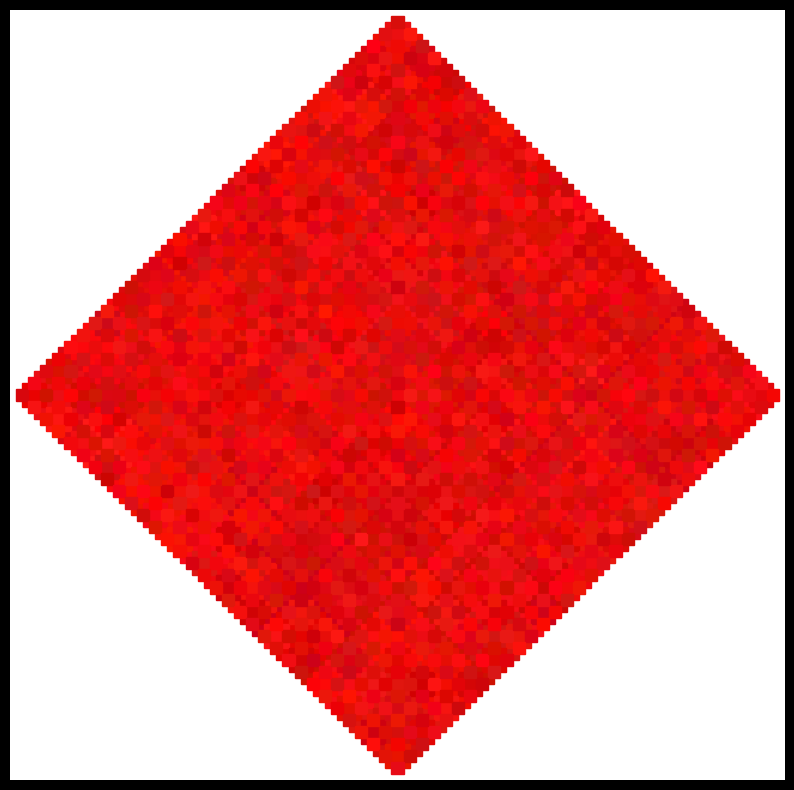

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.patches import Rectangle

def generate_art(ax, x, y, size, depth, vibrant):
    if depth <= 0:
        return

    # Base color
    if vibrant:
        color = (random.uniform(0.8, 1), random.uniform(0, 0.1), random.uniform(0, 0.1))  # Red tones
    else:
        color = (random.uniform(0, 0.1), random.uniform(0, 0.1), random.uniform(0, 0.1))  # Black tones

    # Draw rectangle
    rectangle = Rectangle((x - size / 2, y - size / 2), size, size, color=color)
    ax.add_patch(rectangle)

    # Recursive calls with smaller size and reduced depth
    generate_art(ax, x - size / 2, y, size / 2, depth - 1, vibrant)
    generate_art(ax, x + size / 2, y, size / 2, depth - 1, vibrant)
    generate_art(ax, x, y - size / 2, size / 2, depth - 1, vibrant)
    generate_art(ax, x, y + size / 2, size / 2, depth - 1, vibrant)

def generate_ship_of_theseus_art(vibrant=True):
    # Set the size of the figure
    fig, ax = plt.subplots(figsize=(10, 10))

    # Set the axis limits
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Generate recursive art
    generate_art(ax, 0.5, 0.5, 0.5, 6, vibrant)

   

    # Remove axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Set background color
    fig.patch.set_facecolor('black')

    # Display the artwork
    plt.show()

# Generate a black and red Ship of Theseus art piece
generate_ship_of_theseus_art(vibrant=True)


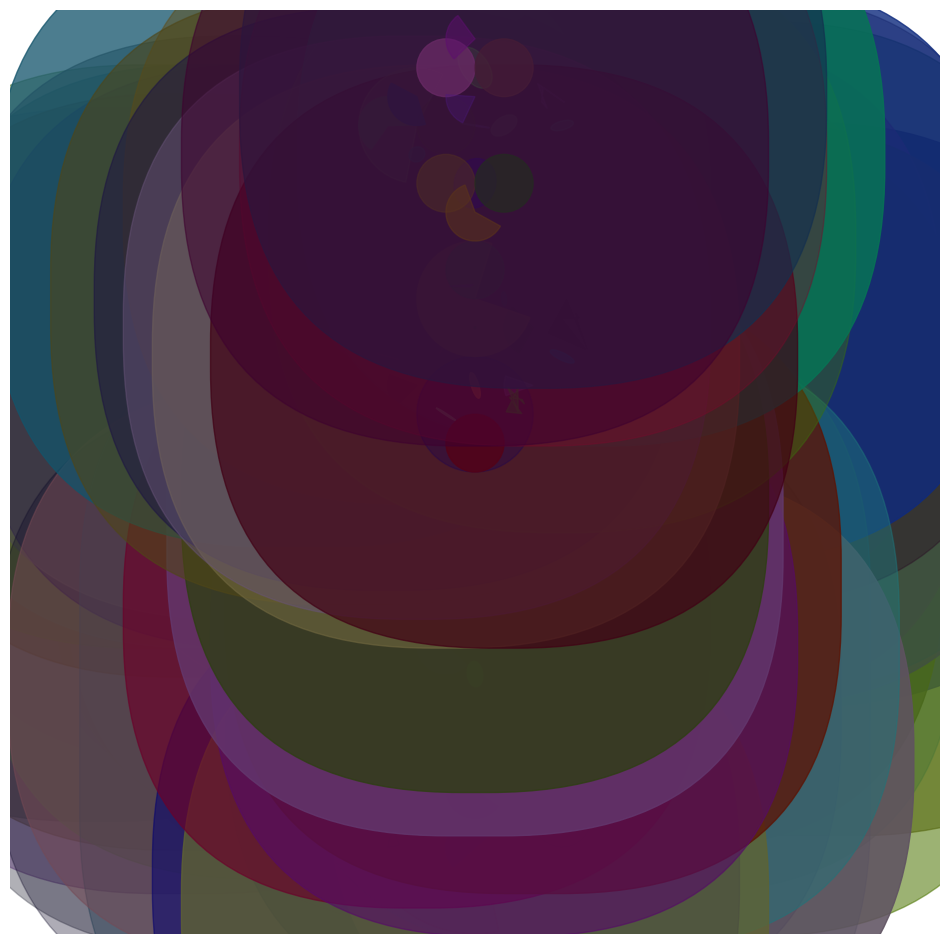

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.patches import Ellipse, Polygon, FancyBboxPatch, Wedge

def generate_gradient(ax, color1, color2):
    for i in range(100):
        ax.axhspan(i / 100, (i + 1) / 100, color=(color1 * (1 - i / 100) + color2 * i / 100), zorder=-1)

def recursive_art(ax, x, y, size, depth, vibrant):
    if depth <= 0:
        return

    # Random color
    if vibrant:
        color = (random.random(), random.random(), random.random())
    else:
        color = (random.random() * 0.5, random.random() * 0.5, random.random() * 0.5)

    # Random shape type
    shape_type = random.choice(['circle', 'ellipse', 'polygon', 'bbox', 'wedge'])

    if shape_type == 'circle':
        circle = plt.Circle((x, y), size, color=color, alpha=random.uniform(0.3, 0.9))
        ax.add_patch(circle)
    elif shape_type == 'ellipse':
        width, height = size * random.random(), size * random.random()
        ellipse = Ellipse((x, y), width, height, angle=random.randint(0, 360), color=color, alpha=random.uniform(0.3, 0.9))
        ax.add_patch(ellipse)
    elif shape_type == 'polygon':
        complexity = random.randint(3, 12)
        polygon = Polygon(np.random.rand(complexity, 2) * size + [x, y], closed=True, color=color, alpha=random.uniform(0.3, 0.9))
        ax.add_patch(polygon)
    elif shape_type == 'bbox':
        bbox = FancyBboxPatch((x - size / 2, y - size / 2), size, size, boxstyle="round,pad=0.3", color=color, alpha=random.uniform(0.3, 0.9))
        ax.add_patch(bbox)
    elif shape_type == 'wedge':
        theta1, theta2 = random.randint(0, 180), random.randint(181, 360)
        wedge = Wedge((x, y), size, theta1, theta2, color=color, alpha=random.uniform(0.3, 0.9))
        ax.add_patch(wedge)

    # Recursive calls with smaller size and reduced depth
    recursive_art(ax, x - size / 2, y, size / 2, depth - 1, vibrant)
    recursive_art(ax, x + size / 2, y, size / 2, depth - 1, vibrant)
    recursive_art(ax, x, y - size / 2, size / 2, depth - 1, vibrant)
    recursive_art(ax, x, y + size / 2, size / 2, depth - 1, vibrant)

def generate_art(vibrant=True):
    # Set the size of the figure
    fig, ax = plt.subplots(figsize=(12, 12))

    # Set the axis limits
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Generate recursive art
    recursive_art(ax, 0.5, 0.5, 0.5, 5, vibrant)

    # Remove axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Display the artwork
    plt.show()

# Generate a black and white recursive art piece
generate_art(vibrant=False)


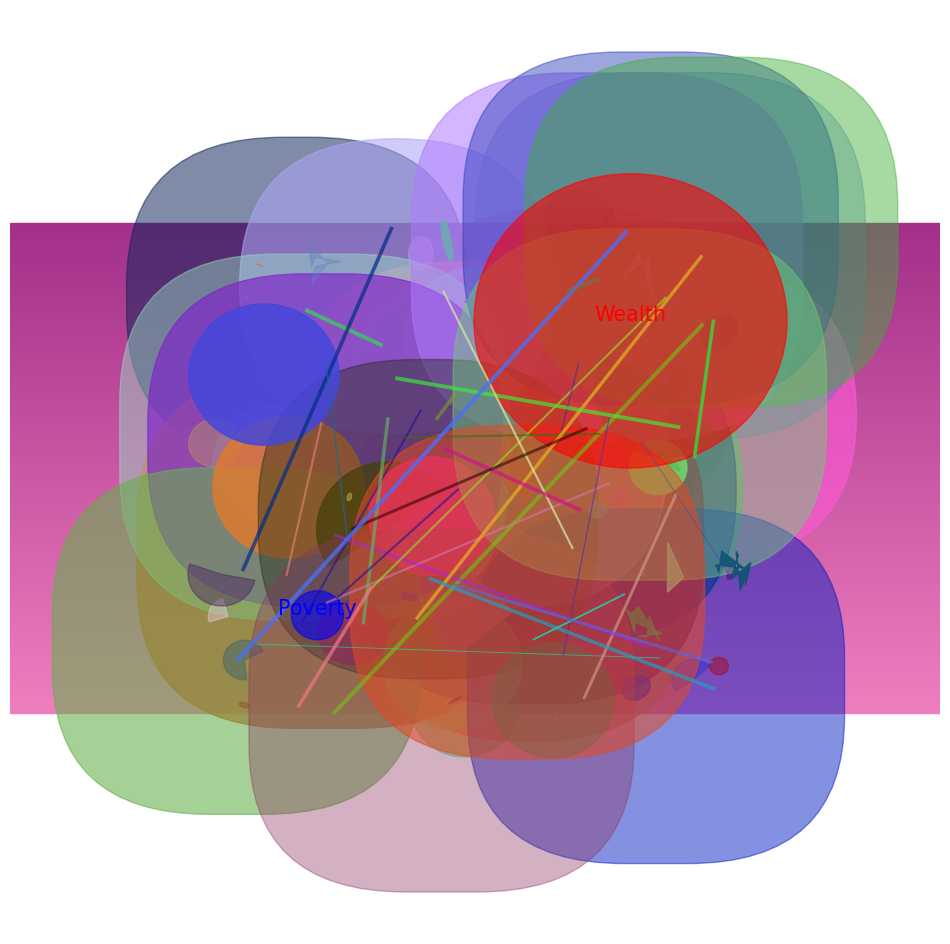

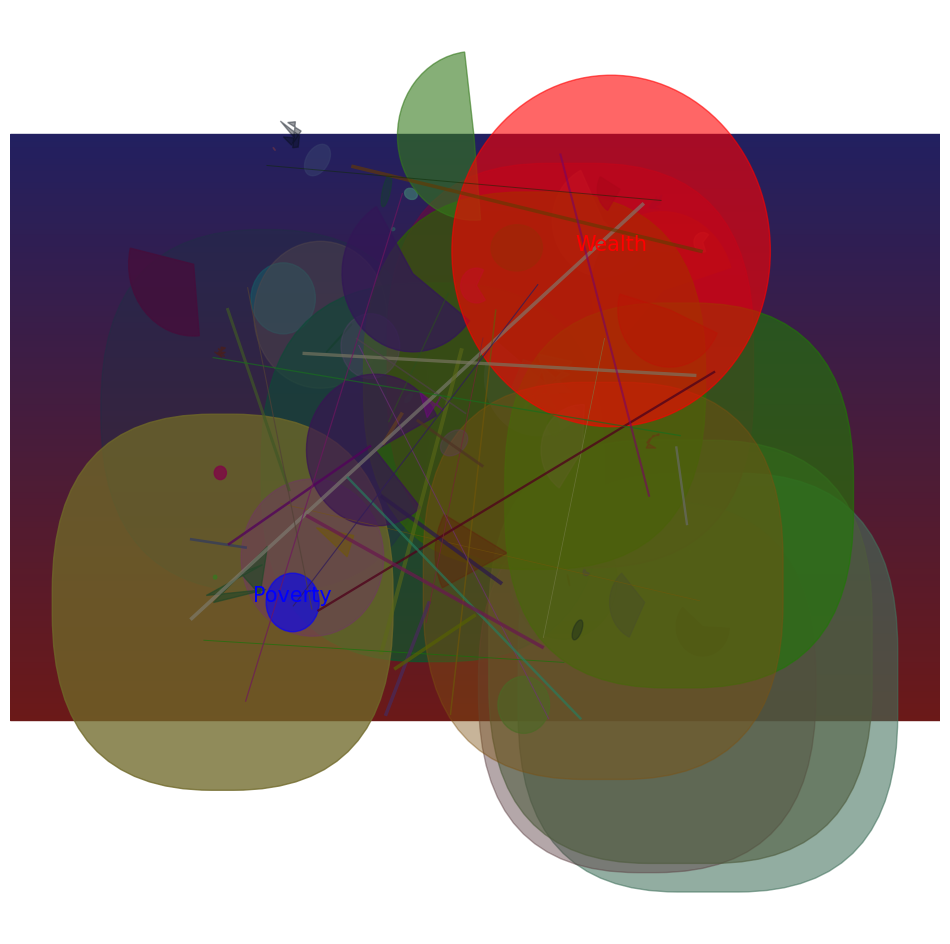

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.patches import Ellipse, Polygon, FancyBboxPatch, Wedge

def generate_gradient(ax, color1, color2):
    for i in range(100):
        ax.axhspan(i / 100, (i + 1) / 100, color=(color1 * (1 - i / 100) + color2 * i / 100), zorder=-1)

def generate_art(vibrant=True):
    # Set the size of the figure
    fig, ax = plt.subplots(figsize=(12, 12))

    # Gradient background
    if vibrant:
        color1 = np.random.rand(3)
        color2 = np.random.rand(3)
    else:
        color1 = np.random.rand(3) * 0.5
        color2 = np.random.rand(3) * 0.5

    generate_gradient(ax, color1, color2)

    # Number of shapes
    num_shapes = random.randint(50, 100)

    for _ in range(num_shapes):
        # Random position
        x, y = random.random(), random.random()

        # Random size and complexity
        size = random.random() * 0.15
        complexity = random.randint(3, 12)

        # Random color
        if vibrant:
            color = (random.random(), random.random(), random.random())
        else:
            color = (random.random() * 0.5, random.random() * 0.5, random.random() * 0.5)

        # Random shape type
        shape_type = random.choice(['circle', 'ellipse', 'polygon', 'bbox', 'wedge'])

        if shape_type == 'circle':
            circle = plt.Circle((x, y), size, color=color, alpha=random.uniform(0.3, 0.9))
            ax.add_patch(circle)
        elif shape_type == 'ellipse':
            width, height = size * random.random(), size * random.random()
            ellipse = Ellipse((x, y), width, height, angle=random.randint(0, 360), color=color, alpha=random.uniform(0.3, 0.9))
            ax.add_patch(ellipse)
        elif shape_type == 'polygon':
            polygon = Polygon(np.random.rand(complexity, 2) * size + [x, y], closed=True, color=color, alpha=random.uniform(0.3, 0.9))
            ax.add_patch(polygon)
        elif shape_type == 'bbox':
            bbox = FancyBboxPatch((x - size / 2, y - size / 2), size, size, boxstyle="round,pad=0.3", color=color, alpha=random.uniform(0.3, 0.9))
            ax.add_patch(bbox)
        elif shape_type == 'wedge':
            theta1, theta2 = random.randint(0, 180), random.randint(181, 360)
            wedge = Wedge((x, y), size, theta1, theta2, color=color, alpha=random.uniform(0.3, 0.9))
            ax.add_patch(wedge)

    # Add random lines for additional complexity
    for _ in range(30):
        # Random position
        x_start, y_start = random.random(), random.random()
        x_end, y_end = random.random(), random.random()

        # Random line width and color
        line_width = random.uniform(0.5, 3)
        line_color = (random.random(), random.random(), random.random()) if vibrant else (random.random() * 0.5, random.random() * 0.5, random.random() * 0.5)

        # Draw line
        ax.plot([x_start, x_end], [y_start, y_end], color=line_color, linewidth=line_width, alpha=random.uniform(0.5, 0.8))

    # Highlight the concept of inequality with contrasting elements
    large_size = 0.3
    small_size = 0.05
    large_circle = plt.Circle((0.8, 0.8), large_size, color='red', alpha=0.6)
    small_circle = plt.Circle((0.2, 0.2), small_size, color='blue', alpha=0.6)
    ax.add_patch(large_circle)
    ax.add_patch(small_circle)

    # Annotations to depict inequality
    ax.annotate('Wealth', (0.8, 0.8), color='red', fontsize=15, ha='center')
    ax.annotate('Poverty', (0.2, 0.2), color='blue', fontsize=15, ha='center')

    # Remove axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Display the artwork
    plt.show()

# Generate a vibrant art piece
generate_art(vibrant=True)

# Generate a gloomy art piece
generate_art(vibrant=False)


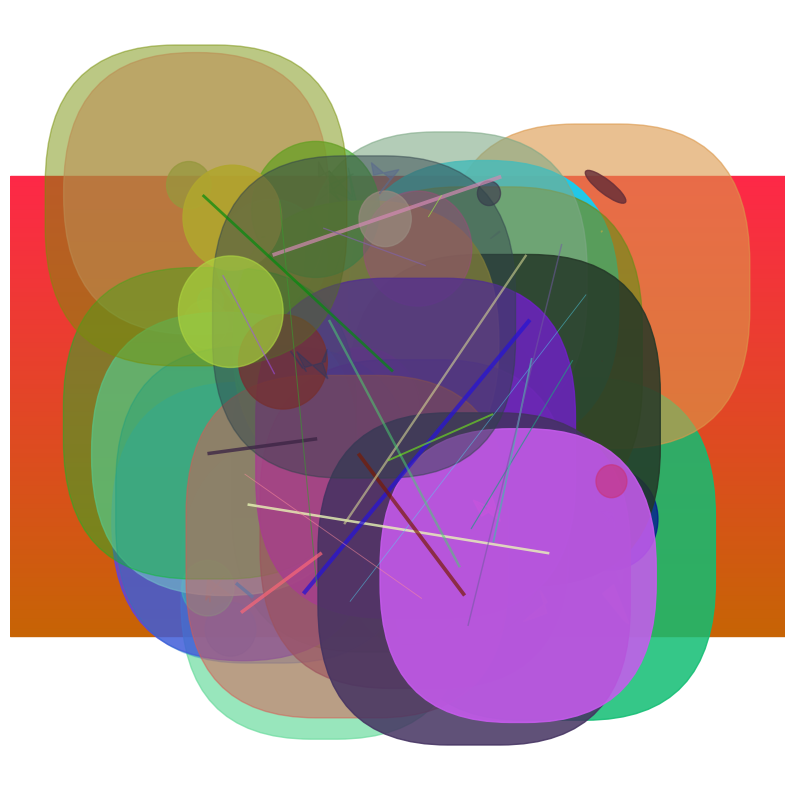

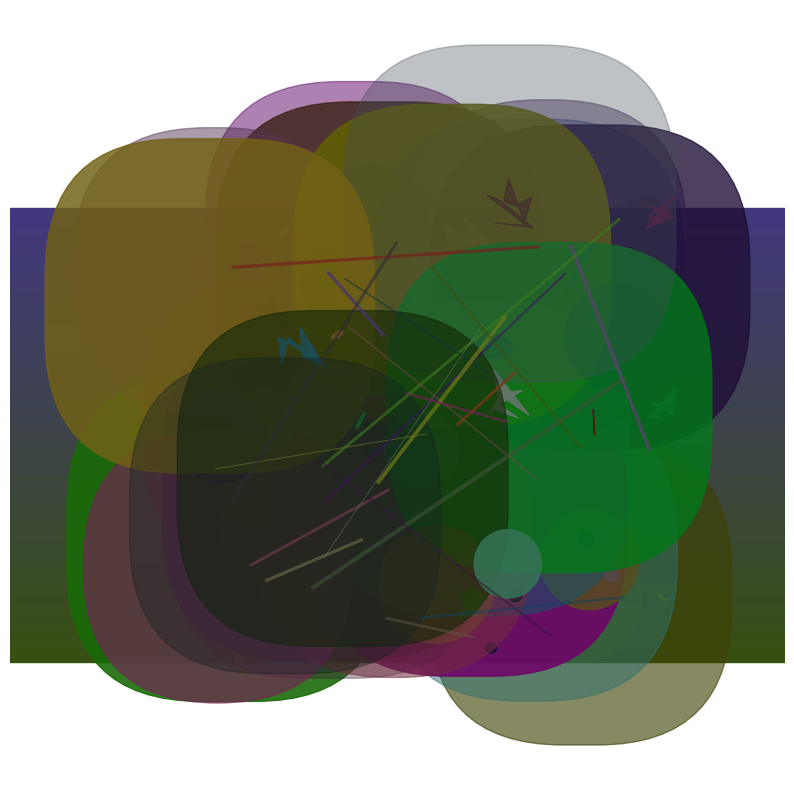

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.patches import Ellipse, Polygon, FancyBboxPatch

def generate_gradient(ax, color1, color2):
    x = np.linspace(0, 1, 100)
    for i in range(100):
        ax.axhspan(i/100, (i+1)/100, color=(color1*(1-i/100) + color2*i/100))

def generate_art(vibrant=True):
    # Set the size of the figure
    fig, ax = plt.subplots(figsize=(10, 10))

    # Gradient background
    if vibrant:
        color1 = np.random.rand(3)
        color2 = np.random.rand(3)
    else:
        color1 = np.random.rand(3) * 0.5
        color2 = np.random.rand(3) * 0.5

    generate_gradient(ax, color1, color2)

    # Number of shapes
    num_shapes = random.randint(50, 100)

    for _ in range(num_shapes):
        # Random position
        x, y = random.random(), random.random()

        # Random size and complexity
        size = random.random() * 0.15
        complexity = random.randint(3, 12)

        # Random color
        if vibrant:
            color = (random.random(), random.random(), random.random())
        else:
            color = (random.random() * 0.5, random.random() * 0.5, random.random() * 0.5)

        # Random shape type
        shape_type = random.choice(['circle', 'ellipse', 'polygon', 'bbox'])

        if shape_type == 'circle':
            circle = plt.Circle((x, y), size, color=color, alpha=random.uniform(0.3, 0.9))
            ax.add_patch(circle)
        elif shape_type == 'ellipse':
            width, height = size * random.random(), size * random.random()
            ellipse = Ellipse((x, y), width, height, angle=random.randint(0, 360), color=color, alpha=random.uniform(0.3, 0.9))
            ax.add_patch(ellipse)
        elif shape_type == 'polygon':
            polygon = Polygon(np.random.rand(complexity, 2) * size + [x, y], closed=True, color=color, alpha=random.uniform(0.3, 0.9))
            ax.add_patch(polygon)
        elif shape_type == 'bbox':
            bbox = FancyBboxPatch((x - size / 2, y - size / 2), size, size, boxstyle="round,pad=0.3", color=color, alpha=random.uniform(0.3, 0.9))
            ax.add_patch(bbox)

    # Add random lines and curves for additional complexity
    for _ in range(20):
        # Random position
        x_start, y_start = random.random(), random.random()
        x_end, y_end = random.random(), random.random()

        # Random line width and color
        line_width = random.uniform(0.5, 3)
        line_color = (random.random(), random.random(), random.random()) if vibrant else (random.random() * 0.5, random.random() * 0.5, random.random() * 0.5)

        # Draw line
        ax.plot([x_start, x_end], [y_start, y_end], color=line_color, linewidth=line_width, alpha=random.uniform(0.5, 0.8))

    # Remove axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Display the artwork
    plt.show()

# Generate a vibrant art piece
generate_art(vibrant=True)

# Generate a gloomy art piece
generate_art(vibrant=False)
